 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [241]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [242]:
# Reading whale returns
whales_data =Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whales_data,index_col="Date", parse_dates=True, infer_datetime_format= True)

In [243]:
# Count nulls
whale_returns= whale_returns.replace(0,np.nan)

In [244]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [245]:
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [246]:
# Reading algorithmic returns
algo_data = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_data, index_col="Date", parse_dates= True, infer_datetime_format= True)

In [247]:
# Count nulls
algo_returns = algo_returns.replace(0,np.nan)

In [248]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [249]:
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [250]:
# Reading S&P 500 Closing Prices
Sp500_data = Path("Resources/Sp500_history.csv")
Sp500_cp = pd.read_csv(Sp500_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [251]:
Sp500_cp.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [252]:
# Check Data Types

Sp500_cp.dtypes


Close    object
dtype: object

In [253]:
# Fix Data Types
Sp500_cp.sort_index(inplace=True)
Sp500_cp['Close']=Sp500_cp['Close'].str.replace("$",'').astype(float)
Sp500_cp.head()

/Users/aarticouture/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [254]:
# Calculate Daily Returns


Sp500_returns = Sp500_cp.astype(float).pct_change()
Sp500_returns.sort_index()
Sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [255]:
# Drop nulls
Sp500_returns = Sp500_returns.dropna()
Sp500_returns.isnull().sum()


Close    0
dtype: int64

In [256]:
# Rename `Close` Column to be specific to this portfolio. *************

Sp500_returns.rename(columns={'Close':'SP500'}, inplace=True)


## Combine Whale, Algorithmic, and S&P 500 Returns

In [257]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns, algo_returns, Sp500_returns], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

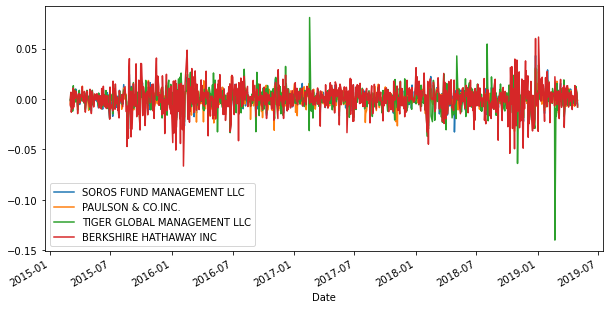

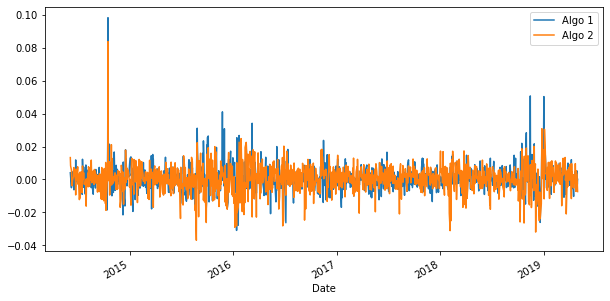

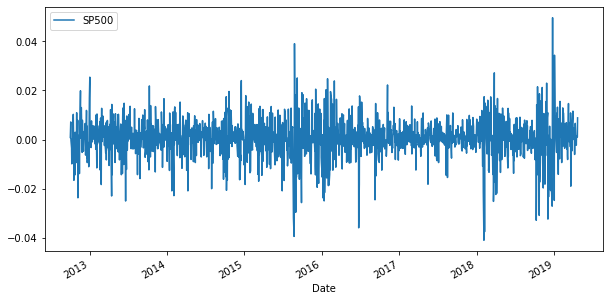

In [258]:
# Plot daily returns of all portfolios
whale_returns.plot(figsize=(10,5))
algo_returns.plot(figsize=(10,5))
Sp500_returns.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

In [259]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns



# Plot cumulative returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072
...,...,...,...,...,...,...,...
2019-04-16,1.160965,0.786811,0.862080,1.526861,1.943741,1.257051,1.382814
2019-04-17,1.157602,0.781723,0.858279,1.531781,1.923719,1.250479,1.379670
2019-04-18,1.159278,0.782678,0.858778,1.534716,1.922588,1.248941,1.381848


---

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

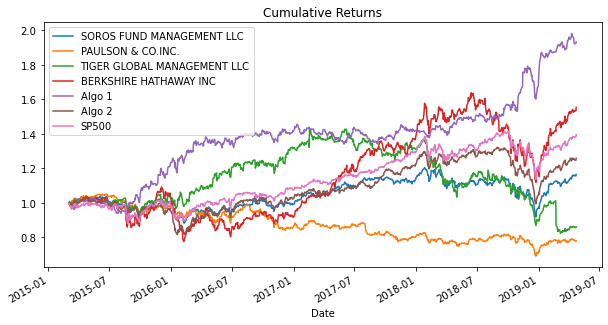

In [260]:
cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns")

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

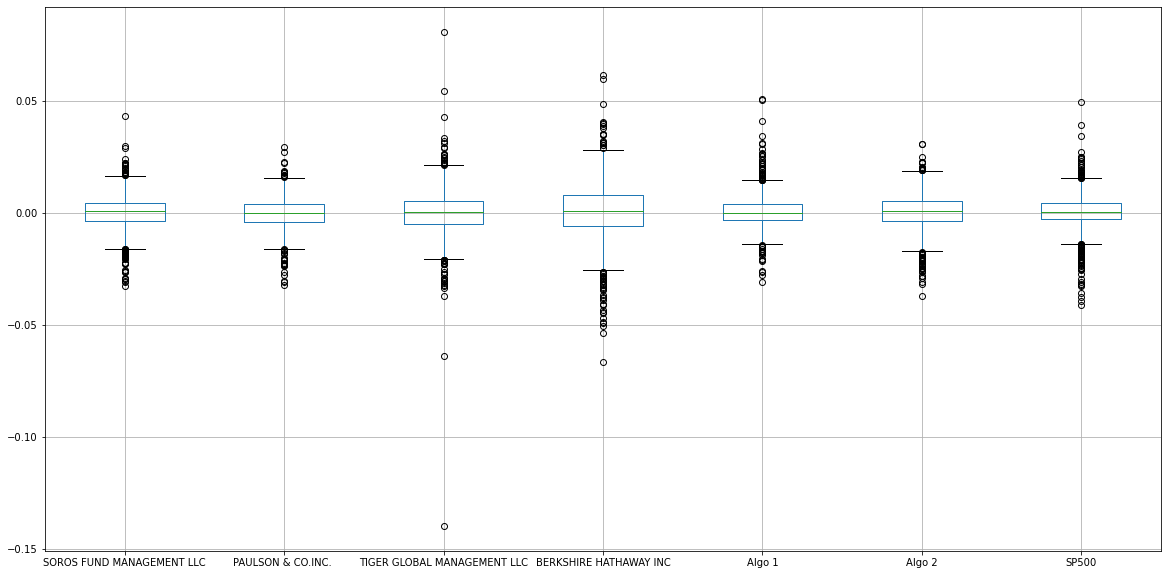

In [263]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [206]:
# Calculate the daily standard deviations of all portfolios
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.008008
PAULSON & CO.INC.              0.007123
TIGER GLOBAL MANAGEMENT LLC    0.011049
BERKSHIRE HATHAWAY INC         0.013102
Algo 1                         0.007675
Algo 2                         0.008320
SP500                          0.008574
dtype: float64

### Determine which portfolios are riskier than the S&P 500

# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500

Tiger Global Management(0.011049) and Berkshire Hathaway(0.013102) have higher
standard deviations than the S&P(0.008574) making them riskier than the SP500.

### Calculate the Annualized Standard Deviation

In [208]:
# Calculate the annualized standard deviation (252 trading days)
annualized_variance = (combined_df.var()*252)
annualized_std = np.sqrt(annualized_variance)
annualized_std

SOROS FUND MANAGEMENT LLC      0.127116
PAULSON & CO.INC.              0.113071
TIGER GLOBAL MANAGEMENT LLC    0.175394
BERKSHIRE HATHAWAY INC         0.207987
Algo 1                         0.121840
Algo 2                         0.132071
SP500                          0.136114
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

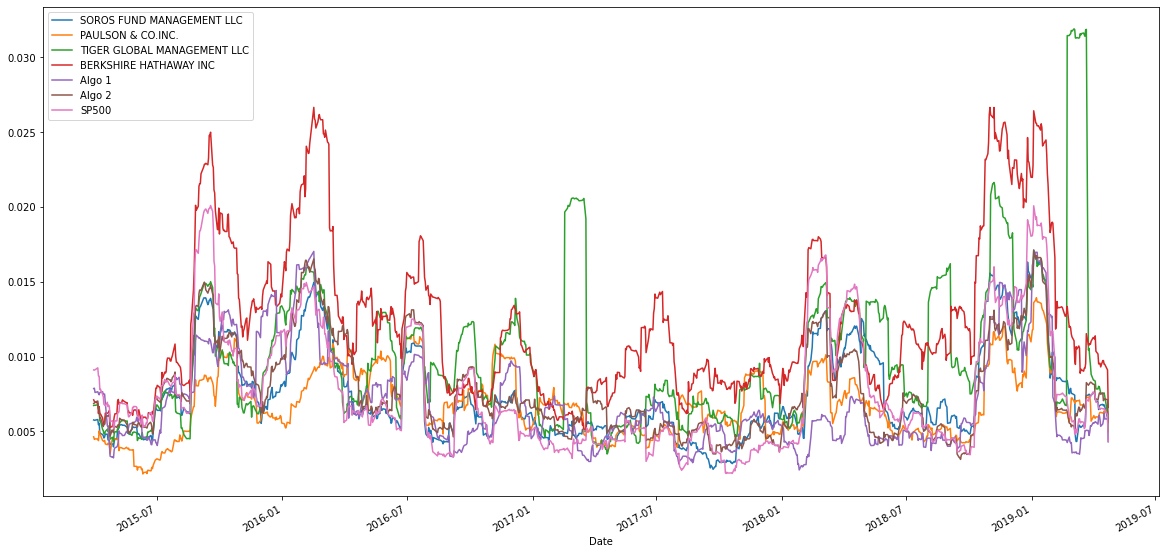

In [209]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation

combined_df.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [210]:
# Calculate the correlation
correlation = combined_df.corr()
correlation

# Display de correlation matrix


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699948,0.561253,0.754357,0.323390,0.840913,0.847691
PAULSON & CO.INC.,0.699948,1.000000,0.434478,0.545676,0.270782,0.689659,0.677684
TIGER GLOBAL MANAGEMENT LLC,0.561253,0.434478,1.000000,0.424441,0.165547,0.516021,0.631307
BERKSHIRE HATHAWAY INC,0.754357,0.545676,0.424441,1.000000,0.293974,0.699781,0.760159
Algo 1,0.323390,0.270782,0.165547,0.293974,1.000000,0.286021,0.276411
Algo 2,0.840913,0.689659,0.516021,0.699781,0.286021,1.000000,0.858669
SP500,0.847691,0.677684,0.631307,0.760159,0.276411,0.858669,1.000000


<AxesSubplot:>

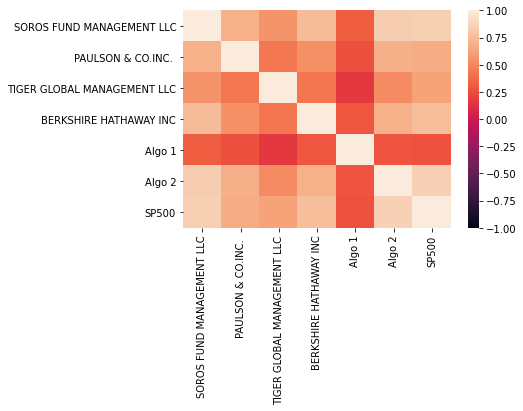

In [211]:
sns.heatmap(correlation, vmin=-1, vmax=1,)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [212]:
# Calculate covariance of a single portfolio
covariance = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['SP500'])
covariance







8.539683720078414e-05

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [213]:
# Calculate variance of S&P 500

variance = combined_df['SP500'].var()
variance

7.351964471554546e-05

In [214]:
# Computing beta

BERKHW_beta = covariance / variance
BERKHW_beta

1.161551276957236

In [215]:
rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['SP500'])
rolling_variance = combined_df['SP500'].rolling(window=60).var()

<AxesSubplot:title={'center':'Rolling 30-Day Beta Berkshire Hathaway'}, xlabel='Date'>

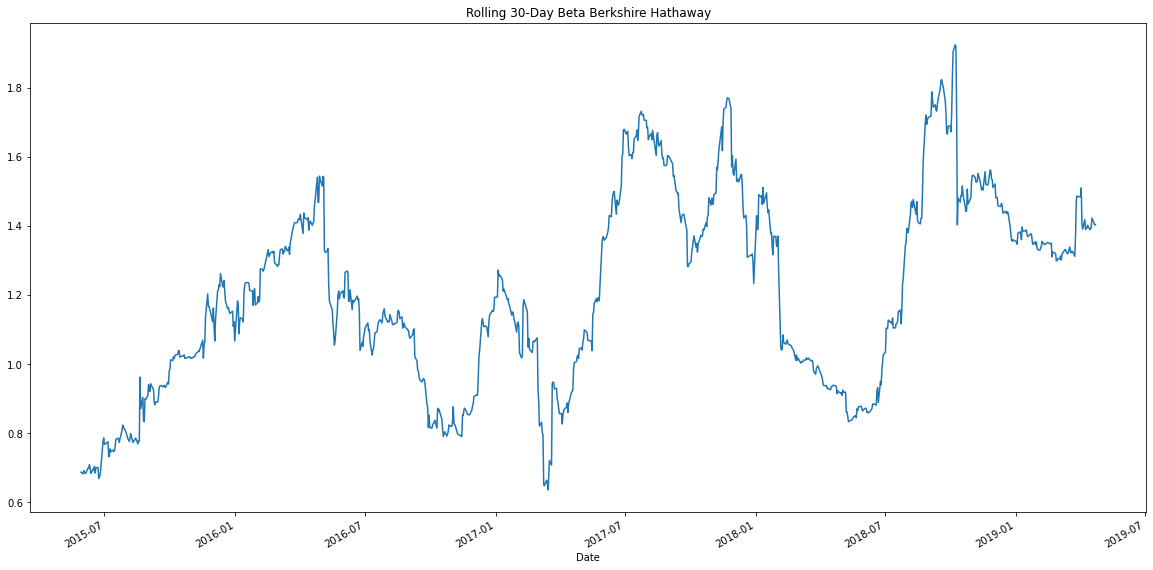

In [216]:
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta Berkshire Hathaway')

<AxesSubplot:xlabel='Date'>

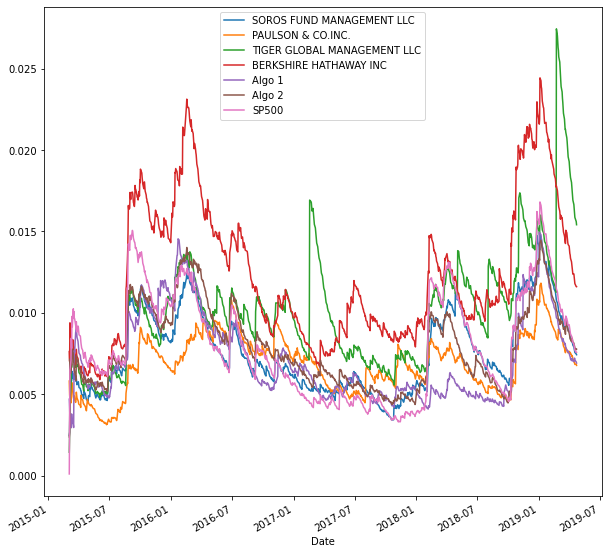

In [217]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize=(10,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [218]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.361475
PAULSON & CO.INC.             -0.490436
TIGER GLOBAL MANAGEMENT LLC   -0.122777
BERKSHIRE HATHAWAY INC         0.630644
Algo 1                         1.405765
Algo 2                         0.498867
SP500                          0.676679
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

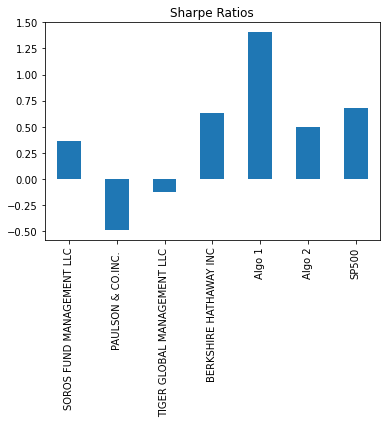

In [219]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 outperforms both the SP500 and the Whale portfolios. Algo 2 outperforms the market but not the all of the Whale portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [221]:
# Reading data from 1st stock
goog_csv = Path("../Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.rename( columns={"Symbol": "GOOG1","NOCP":"GOOG"},inplace = True )
goog_df.drop(columns=['GOOG1'], axis=1, inplace = True)

In [222]:
# Reading data from 2nd stock
aapl_csv = Path("../Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.rename( columns={"Symbol": "AAPL1","NOCP":"AAPL"},inplace = True )
aapl_df.drop(columns=['AAPL1'], axis=1, inplace= True)


In [223]:
# Reading data from 3rd stock
cost_csv = Path("../Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.rename( columns={"Symbol": "COST1","NOCP":"COST"},inplace = True )
cost_df.drop(columns=['COST1'], axis=1,inplace = True)

In [224]:
# Combine all stocks in a single DataFrame
combined_num2 = pd.concat([goog_df, aapl_df, cost_df], axis='columns', join='inner')
combined_num2.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [225]:
# Reset Date index
combined_num2.reset_index(inplace=True)
combined_num2.head()

,Trade DATE,GOOG,AAPL,COST
0,2019-05-09,1162.38,200.72,243.47
1,2019-05-08,1166.27,202.90,241.34
2,2019-05-07,1174.10,202.86,240.18
3,2019-05-06,1189.39,208.48,244.23
4,2019-05-03,1185.40,211.75,244.62


In [226]:
# Reorganize portfolio data by having a column per symbol
combined_num3=combined_num2.reindex(columns= ['index','Trade DATE','AAPL', 'COST','GOOG'])
combined_num3.head()


,index,Trade DATE,AAPL,COST,GOOG
0,NaN,2019-05-09,200.72,243.47,1162.38
1,NaN,2019-05-08,202.90,241.34,1166.27
2,NaN,2019-05-07,202.86,240.18,1174.10
3,NaN,2019-05-06,208.48,244.23,1189.39
4,NaN,2019-05-03,211.75,244.62,1185.40


In [227]:
#Calc daily returns

daily_returns = combined_pt2.pct_change()
daily_returns.head()






,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479


In [228]:
# Drop NAs
combined_pt2.dropna()


,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60
...,...,...,...
2019-05-03,1185.40,211.75,244.62
2019-05-06,1189.39,208.48,244.23
2019-05-07,1174.10,202.86,240.18


In [229]:
#Display sample data
combined_pt2.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [230]:
# Set weights
weights = [1/3, 1/3, 1/3]
portfolio_returns = daily_returns.dot(weights)

# Calculate portfolio return
custom = pd.DataFrame(portfolio_returns)

# Display sample data
custom.head()

,0
Trade DATE,
2018-05-11,NaN
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [231]:
# Join your returns DataFrame to the original returns DataFrame
combined_pt3 = pd.concat([portfolio_returns, combined_df], axis='columns', join='inner')
combined_pt3.rename(columns= {0: "Custom"},inplace = True )
combined_pt3.sort_index()
combined_pt3.head()

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2018-05-11,NaN,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


In [232]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_pt3 = pd.concat([portfolio_returns, combined_df], axis='columns', join='inner')
combined_pt3.rename(columns= {0: "Custom"},inplace = True )
combined_pt3.dropna(inplace=True)
combined_pt3.sort_index()
combined_pt3.head()

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
2018-05-21,0.007600,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.007387


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [233]:
# Calculate the annualized `std`
combined_pt3.std()
annualized_variance_pt2 = (combined_pt3.var()*252)
annualized_std_pt2 = np.sqrt(annualized_variance_pt2)
annualized_std_pt2

Custom                         0.213101
SOROS FUND MANAGEMENT LLC      0.148253
PAULSON & CO.INC.              0.117988
TIGER GLOBAL MANAGEMENT LLC    0.235023
BERKSHIRE HATHAWAY INC         0.249815
Algo 1                         0.134706
Algo 2                         0.140362
SP500                          0.153024
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

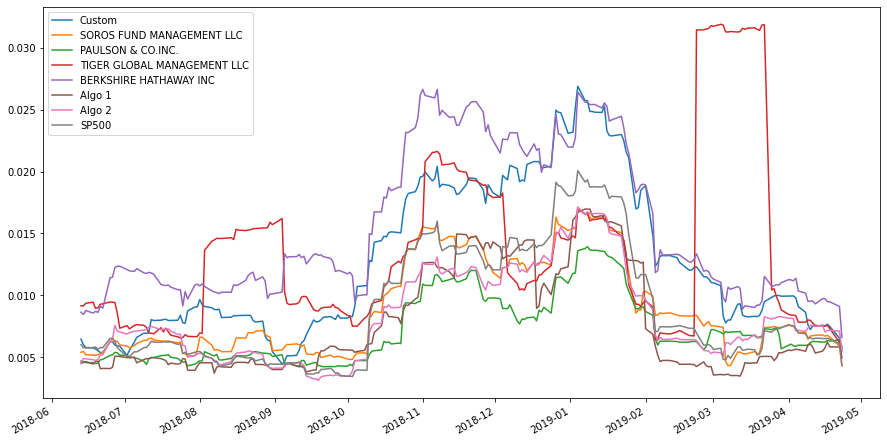

In [234]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
combined_pt3.rolling(window=21).std().plot(figsize=(15,8))



### Calculate and plot the correlation

In [235]:
# Calculate and plot the correlation
correlation = combined_pt3.corr()
correlation

,Custom,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Custom,1.000000,0.735630,0.646279,0.393066,0.803705,0.261153,0.739349,0.871758
SOROS FUND MANAGEMENT LLC,0.735630,1.000000,0.791961,0.478691,0.816676,0.338713,0.867212,0.880925
PAULSON & CO.INC.,0.646279,0.791961,1.000000,0.485422,0.650757,0.362348,0.787594,0.770092
TIGER GLOBAL MANAGEMENT LLC,0.393066,0.478691,0.485422,1.000000,0.325486,0.115441,0.411359,0.482865
BERKSHIRE HATHAWAY INC,0.803705,0.816676,0.650757,0.325486,1.000000,0.327983,0.786718,0.856060
Algo 1,0.261153,0.338713,0.362348,0.115441,0.327983,1.000000,0.365609,0.289653
Algo 2,0.739349,0.867212,0.787594,0.411359,0.786718,0.365609,1.000000,0.874815
SP500,0.871758,0.880925,0.770092,0.482865,0.856060,0.289653,0.874815,1.000000


<AxesSubplot:>

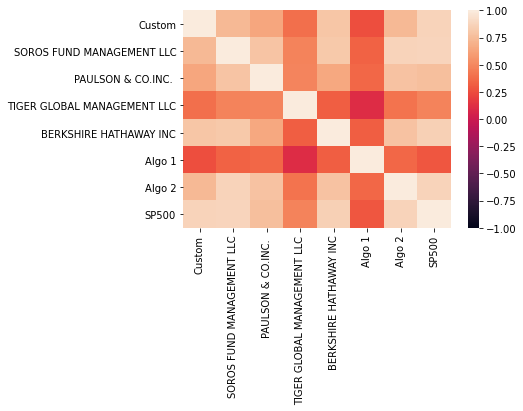

In [236]:
sns.heatmap(correlation, vmin=-1, vmax=1,)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Custom Beta'}>

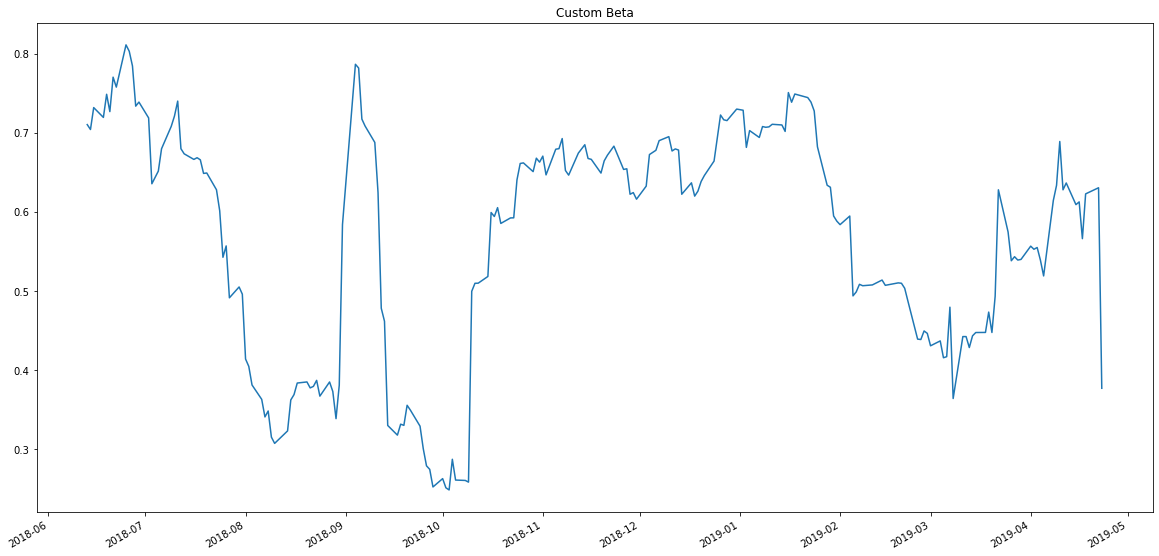

In [237]:
# Calculate and plot Beta
rolling_variance = combined_pt3['Custom'].rolling(window=21).var()
rolling_covariance = combined_pt3['Custom'].rolling(window=21).cov(combined_pt3['SP500'])
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Custom Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [238]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_all = (combined_pt3.mean() * 252) / ((combined_pt3).std() * np.sqrt(252))
sharpe_ratios_all

Custom                         0.888262
SOROS FUND MANAGEMENT LLC      0.435313
PAULSON & CO.INC.              0.261500
TIGER GLOBAL MANAGEMENT LLC   -1.045302
BERKSHIRE HATHAWAY INC         0.161461
Algo 1                         2.143096
Algo 2                         0.034986
SP500                          0.513355
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

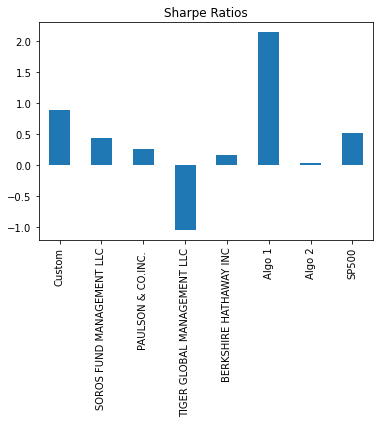

In [239]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

My portfolio out performs the SP500  and Algo 2 but not Algo 1.